<a href="https://colab.research.google.com/github/GodfreySilungwe/origin/blob/main/Copy_of_Coding_Our_First_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Coding Our Model

Before we begin, go to Tools > Settings > Editor and check "Show line numbers." It'll help you follow along with the instructions in the lesson.

### Graphing the Data
This takes us right to where we left off. Make sure you remember how everything works.

Text(0, 0.5, 'Smartcase Grade')

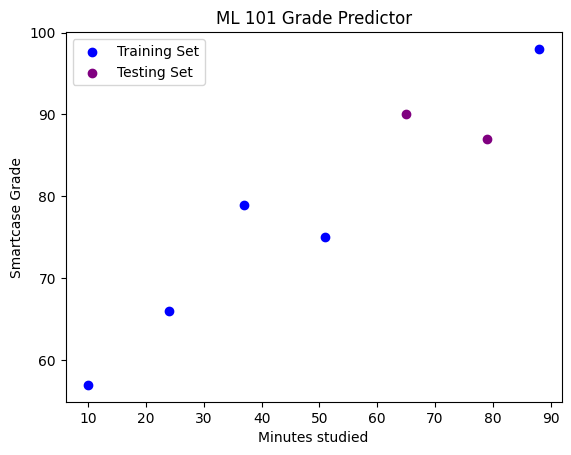

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = np.array([10,24,37,51,65,79,88])
y = np.array([57,66,79,75,90,87,98])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

plt.scatter(X_train, y_train, color="blue", label="Training Set")
plt.scatter(X_test, y_test, color="purple", label="Testing Set")
plt.title("ML 101 Grade Predictor")
plt.legend()
plt.xlabel("Minutes studied")
plt.ylabel("Smartcase Grade")

### Creating the LinearRegression Class

In [22]:
class LinearRegression():

  def __init__(self, learning_rate, iterations): # add hyperparameters and parameters
    # assign all to object attributes
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.w = 0
    self.b = 0

  def predict(self, X):
    y_predicted = self.w * X + self.b # what's the linear regression formula?
    return y_predicted

  def train(self, X, y):
    m = X.size # get the total number of examples, m

    for i in range(self.iterations): # how do we determine the number of iterations?
      y_predicted = self.predict(X) # get the prediction
      dw = (1/m*2) * np.sum((y_predicted - y) * X)# derivative of w
      db = (1/m*2) * np.sum(y_predicted - y) # derivative of b
      # update w
      # update b
      self.w -= self.learning_rate * dw
      self.b -= self.learning_rate * db
      print(f"Epoch {i}: w={self.w}, b={self.b}, dw={dw}, db={db}")

  def mse(self, y_predicted, y):
    m = X.size
    return (1/m) * np.sum((y_predicted - y)**2) # what's the MSE formula?

### Instantiating the Class

In [24]:
grade_predictor = LinearRegression(0.0001, 50000) # instantiate the class
grade_predictor.train(X_train, y_train) # what data goes first?
smartcase_predictions = grade_predictor.predict(X_test) # what data does predict need?
mse_value = grade_predictor.mse(smartcase_predictions, y_test) # what data does mse need?

Streaming output truncated to the last 5000 lines.
Epoch 45000: w=0.5660744297555976, b=50.059221956570504, dw=0.03952049746219473, db=-2.331438302870683
Epoch 45001: w=0.5660704779335313, b=50.059455086969244, dw=0.03951822066408113, db=-2.3313039873887904
Epoch 45002: w=0.5660665263391315, b=50.059688203937206, dw=0.039515943997867, db=-2.3311696796448813
Epoch 45003: w=0.5660625749723853, b=50.05992130747517, dw=0.03951366746105123, db=-2.3310353796385415
Epoch 45004: w=0.5660586238332798, b=50.06015439758391, dw=0.03951139105600987, db=-2.33090108736929
Epoch 45005: w=0.5660546729218016, b=50.06038747426419, dw=0.039509114782538296, db=-2.330766802836686
Epoch 45006: w=0.5660507222379375, b=50.06062053751679, dw=0.03950683864037501, db=-2.330632526040293
Epoch 45007: w=0.5660467717816746, b=50.060853587342486, dw=0.0395045626286219, db=-2.330498256979672
Epoch 45008: w=0.5660428215529998, b=50.06108662374205, dw=0.03950228674850678, db=-2.330363995654355
Epoch 45009: w=0.5660388715

### Graphing the Model

MSE of our test set: 9.406515598591076
Model's parameters are: w: 0.5489090355426344, b: 51.071862487981946


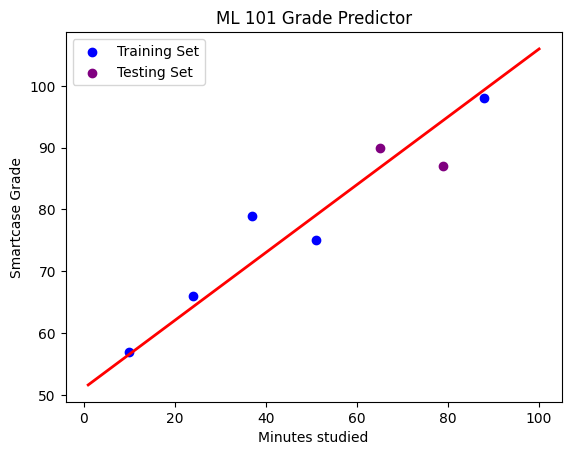

In [25]:
plt.scatter(X_train, y_train, color="blue", label="Training Set")
plt.scatter(X_test, y_test, color="purple", label="Testing Set")
plt.title("ML 101 Grade Predictor")
plt.legend()
plt.xlabel("Minutes studied")
plt.ylabel("Smartcase Grade")

x_data = np.linspace(1,100,100)
plt.plot(x_data, grade_predictor.w * x_data + grade_predictor.b,  color="red", linewidth=2, label="Prediction")
print(f"MSE of our test set: {mse_value}")
print(f"Model's parameters are: w: {grade_predictor.w}, b: {grade_predictor.b}")

### Deploying the Model

In [28]:
your_grade = grade_predictor.predict(56) # put the number of minutes you plan to study here
if(your_grade > 100):
  your_grade = 100
if(your_grade < 0):
  your_grade = 0
print(f"Our model predicts you'll earn a {round(your_grade,1)}% on the upcoming Quantic Smartcase.")
print(f"Formula used to make this prediction: y = {round(grade_predictor.w, 3)}x + {round(grade_predictor.b, 3)}")

Our model predicts you'll earn a 81.8% on the upcoming Quantic Smartcase.
Formula used to make this prediction: y = 0.549x + 51.072
